In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import glob
import os
from collections import Counter
import pandas as pd
import time

In [3]:
#to desaturate the image by turing pixels into black or white based on their value. 
#lighter pixels are turned white and darker pixels are turned black.
def threshold(img_array):
    row_avg=[]
    for eachrow in img_array:
        row_avg.append(np.mean(eachrow))
    avg_color=np.mean(row_avg)
    #print(avg_color)
    
    new_image=np.eye(len(img_array))
    
    for row in range(len(img_array)):
        for pixel in range(len(img_array[row])):
            if img_array[row][pixel]>=avg_color:
                new_image[row][pixel]=255
            else:
                new_image[row][pixel]=0
    new_image=np.array(new_image)
    return new_image

In [4]:
#a slightly different codeblock to threshold, same principle, just for different image format.
def threshold2(img_array):
    new=np.eye(len(img_array))
    rowavg=[]
    for eachrow in img_array:
        rowavg.append(np.mean(eachrow))
    avgcolor=np.mean(rowavg)
    for row in range(len(img_array)):
        for pixel in range(len(img_array[row])):
            if np.mean(img_array[row][pixel])>=avgcolor:
                new[row][pixel]=255
            else:
                new[row][pixel]=0
    new=np.array(new)
    return new

In [5]:
#to read the entire pixel row of the image and give a value to that row
#these values will be then passed to the KNN algorithm
def value(row):
    sum=0
    for i in range(len(row)):
        sum+=row[i]/float(i+1)
    return sum

In [6]:
#loading the extracted data on the program
df=pd.read_csv('train_file21.csv')

#replacing all missing data with NaN value
df.replace('?',np.nan,inplace=True)

#deleting the column with id, 1 in the argument indicates 'column', so this will delete the 'column' containing 'id'
#df.drop(['id'],1,inplace=True)
df.drop(['1'],1,inplace=True)
df.drop(['2'],1,inplace=True)
df.drop(['3'],1,inplace=True)
df.drop(['4'],1,inplace=True)
df.drop(['25'],1,inplace=True)
df.drop(['26'],1,inplace=True)
df.drop(['27'],1,inplace=True)
df.drop(['28'],1,inplace=True)
#delete all the rows that have NaN in them
dk=df.dropna()
full_data=dk.values.tolist()
headers = df.dtypes.index
header=headers.tolist()
header2=header[:-1]

In [7]:
points=[]
for column in header:
    points.append(df[column].tolist())


In [8]:
for point in points:
    del point[0]

In [9]:
#to arrange the data into a KNN acceptable format
dataset={}
for i in range(1,len(df)):
    point=[]
    label=df.loc[[i]]['label'].tolist()[0]
    if label not in dataset:
        dataset[label]=[]
    for head in header2:
        point.append(df.loc[[i]][head].tolist()[0])
    dataset[label].append(point)

In [10]:
#to count the apprearence of an element for KNN
def class_counts(data):
    counts={}
    for row in data:
        label=row
        if label not in counts:
            counts[label]=0
        counts[label]+=1
    return counts

In [11]:
def k_nearest_neighbours(data,predict,k):
    dist=[]
    rev={}
    for group in data:
        for features in data[group]:
            distance=np.linalg.norm(np.array(features)-np.array(predict))
            dist.append([distance,group])
    votes=[i[1] for i in sorted(dist)[:k]]
    uniqueVotes=class_counts(votes)
    
    #print('sorted distance: ',sorted(dist))
    #print('votes: ',uniqueVotes)
    
    for vote in uniqueVotes:
        rev[uniqueVotes[vote]]=vote
    #data[rev[max(rev)]].append(predict)
    return rev[max(rev)]

In [12]:
image='C:/Users/HP/Downloads/DR/digit1.jpg'
def predict(image,show=False):
    img=Image.open(image)
    if show:
        print('input image:')
        plt.grid(False)
        plt.imshow(img)
        plt.show()
    pred=[]
    image_array=np.array(img)
    try:
        image_t=threshold(image_array)
    except:
        image_t=threshold2(image_array)
    image_t_list=image_t.tolist()
    for row_data in image_t_list:
        pred.append(value(row_data))
    pred=pred[4:24]
    #pred
    answer=k_nearest_neighbours(dataset,pred,21)
    #print('predicted value: ',answer)
    return answer
    #return answer

input image:


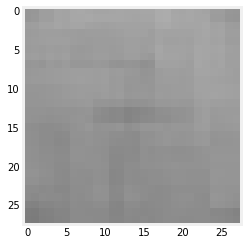

7.0

In [13]:
path='C:/Users/HP/Downloads/DR/digit2.jpg'
predict(path,True)

input image:


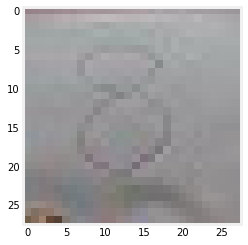

8.0


In [14]:
path='C:/Users/HP/Downloads/DR/'
test_imgs=os.listdir(path)
i=np.random.randint(0,len(test_imgs))
pic=test_imgs[i]
#p=Image.open(path+pic)
p=predict(path+pic,True)
print(p)

input image:


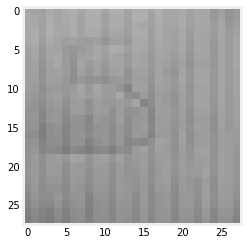

0.0


In [15]:
path='C:/Users/HP/Downloads/DR/'
test_imgs=os.listdir(path)
i=np.random.randint(0,len(test_imgs))
pic=test_imgs[i]
#p=Image.open(path+pic)
p=predict(path+pic,True)
print(p)

input image:


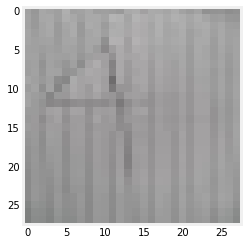

0.0


In [17]:
path='C:/Users/HP/Downloads/DR/'
test_imgs=os.listdir(path)
i=np.random.randint(0,len(test_imgs))
pic=test_imgs[i]
#p=Image.open(path+pic)
p=predict(path+pic,True)
print(p)